# Predicting Fraudulent Insurance Claims

* **Developer**: Samuel Rosales Sosa

* **Creation Date:** 2023/07/05

* **Last Modification Date:** 2023/07/05

* **Description:** This project consists on predicting Fraud Claims so we can reduce losses.



## **The Problem**
Property and casualty insurance fraud accounts for roughly $45 billion of the total. Industry estimates are that roughly 10 percent of property and casualty losses result from fraudulent claims. Source [here](https://www.conroysimberg.com/blog/insurance-fraud-costs-the-u-s-308-billion-annually/#:~:text=Property%20and%20casualty%20insurance%20fraud,losses%20result%20from%20fraudulent%20claims.).


We'll work with dataset describing insurance transactions publicly available at **Oracle Database Online Documentation (2015)**.

## **The Business Process**

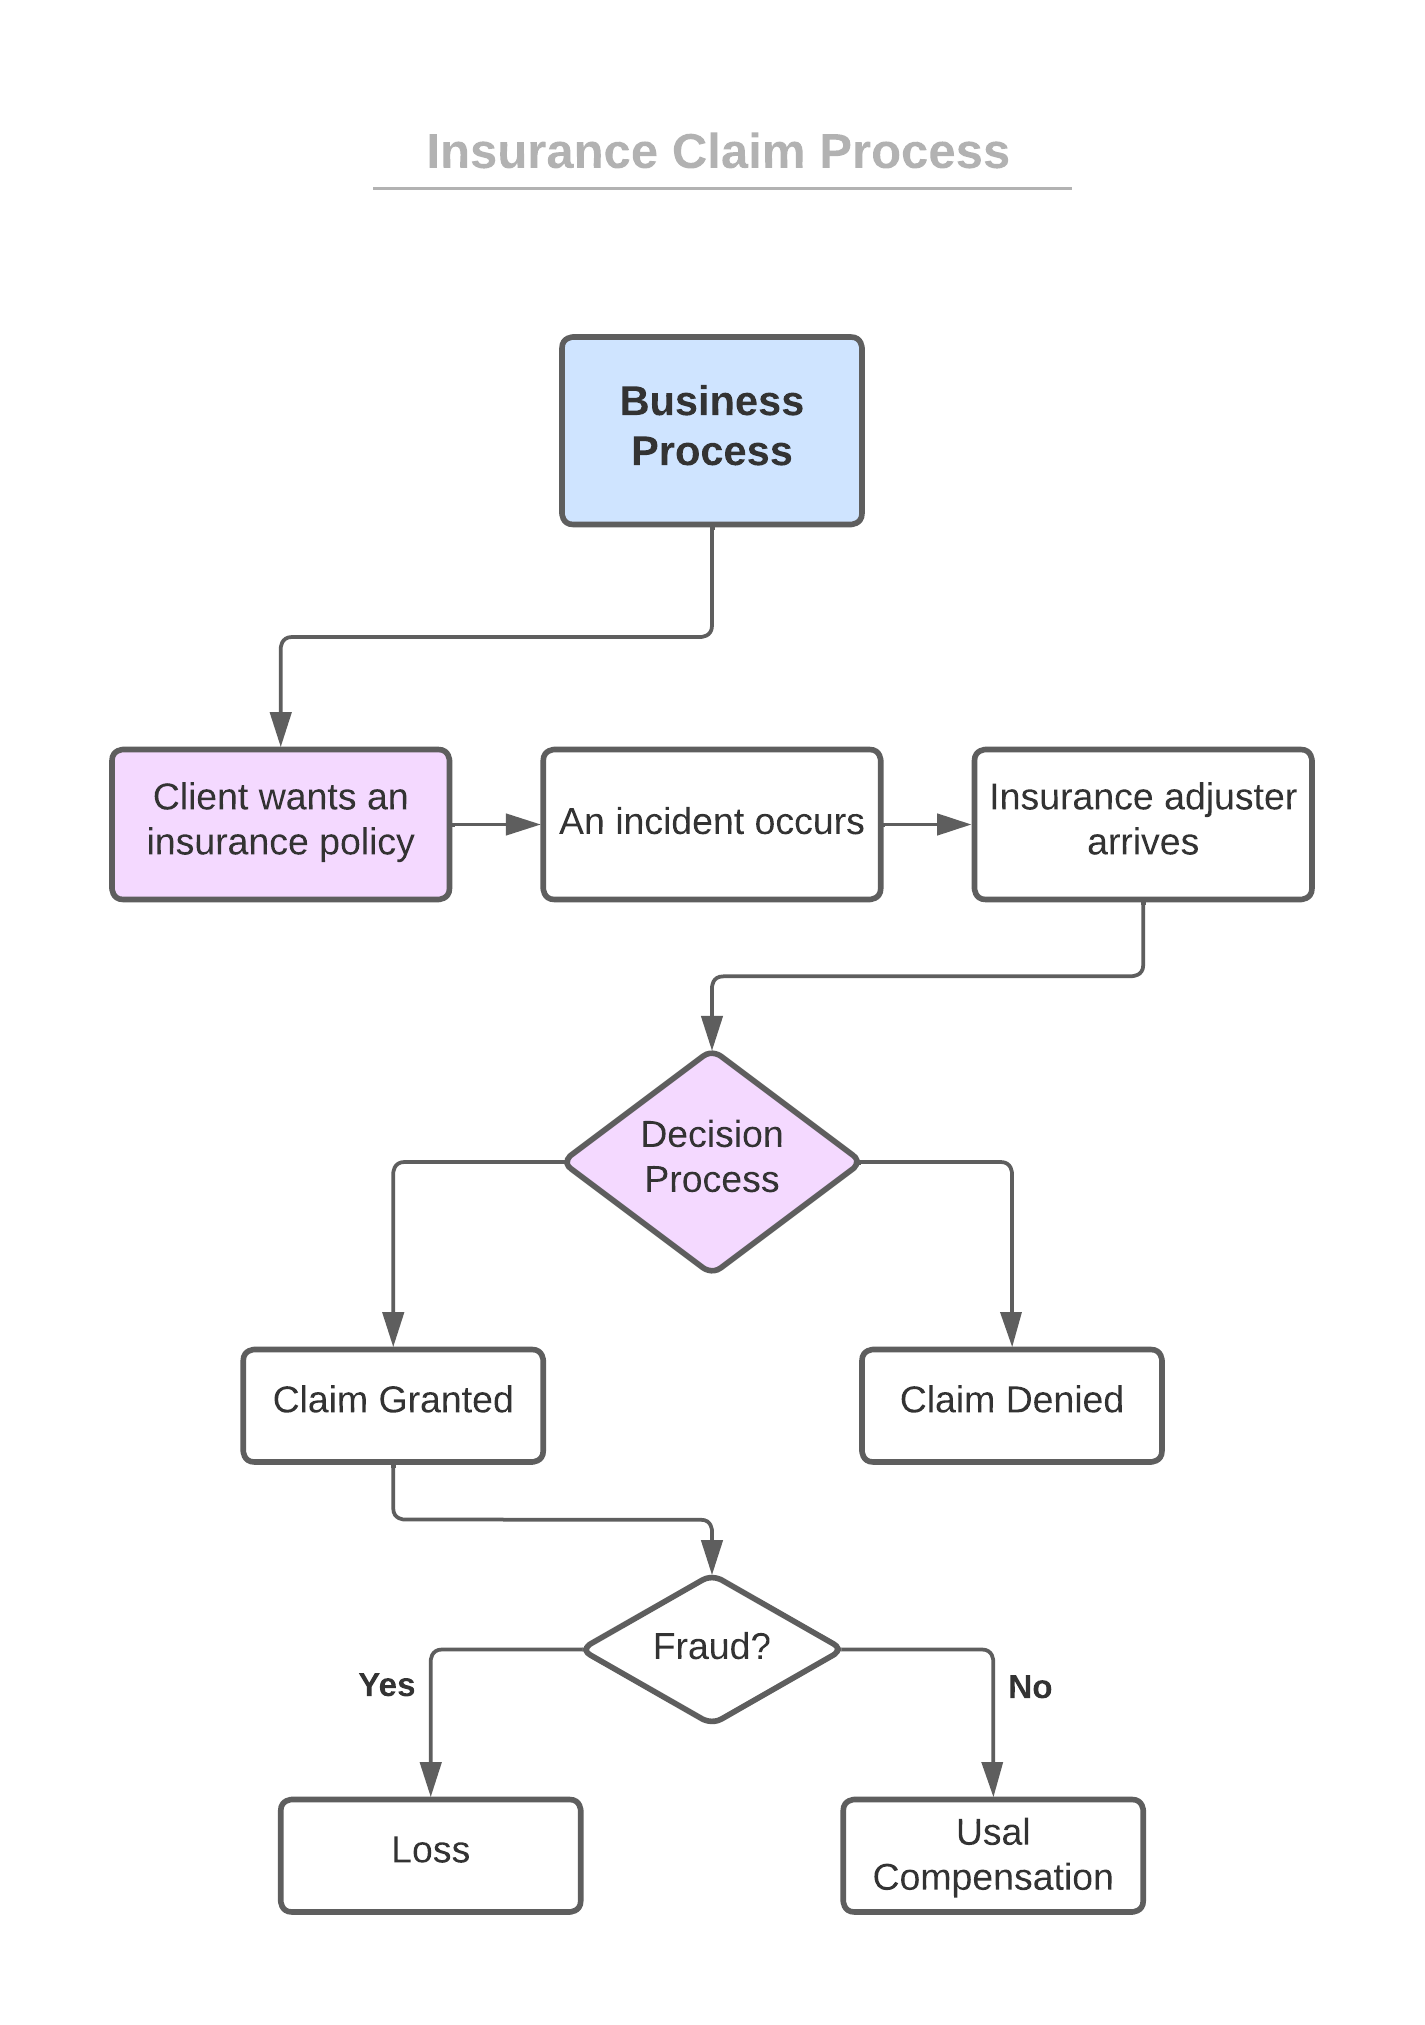

## **Business Requirements**

Predictions can be made during the two purple figures:
1. Before the company accept to insures
2. During the decision process, when an agent decides whether to grant the claim or not.

### **Prediction Frecuency**
It can be done in:
1. Batches: If we decide to predict fraud during the decision process, as we have more time to double-check the policy holders information.
2. Real-Time: If we want to make predictions just when the potential customer wants to acquire a policy.

## **Data Sources**
The dataset contains **15,420 claims**. Each claim has 33 attributes describing the following components:

* Customer demographic details (age, sex, martial status)
* Purchased Policy (policy type, vehicle category, number of supplements, agent type, etc)
* Claim Circumstances (day/month/week claimed, policy report filed, witness present, past days between incident-policy report, incident-claim, etc)
* Other customer data (number of cars, previous claims, driver rating, etc)
* Fraud found (yes; 1 and no; 0)


# **Solution**
Reducing losses in insurance claims will follow the next steps:

1. EDA
2. Data Preprocessing
3. Feature Engineering
4. Feature selection
5. Train model
6. Model evaluation
7. Product


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import traceback
%matplotlib inline

sns.reset_defaults()

In [ ]:
# Error capture function
def capture_error():
    return traceback.format_exc()

In [ ]:
fraud = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Insurance Claims/fraud_oracle.csv')
fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# EDA
The data seems to be complete, but a deeper analysis may reveal more information.

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
fraud.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

## Categorical Variables

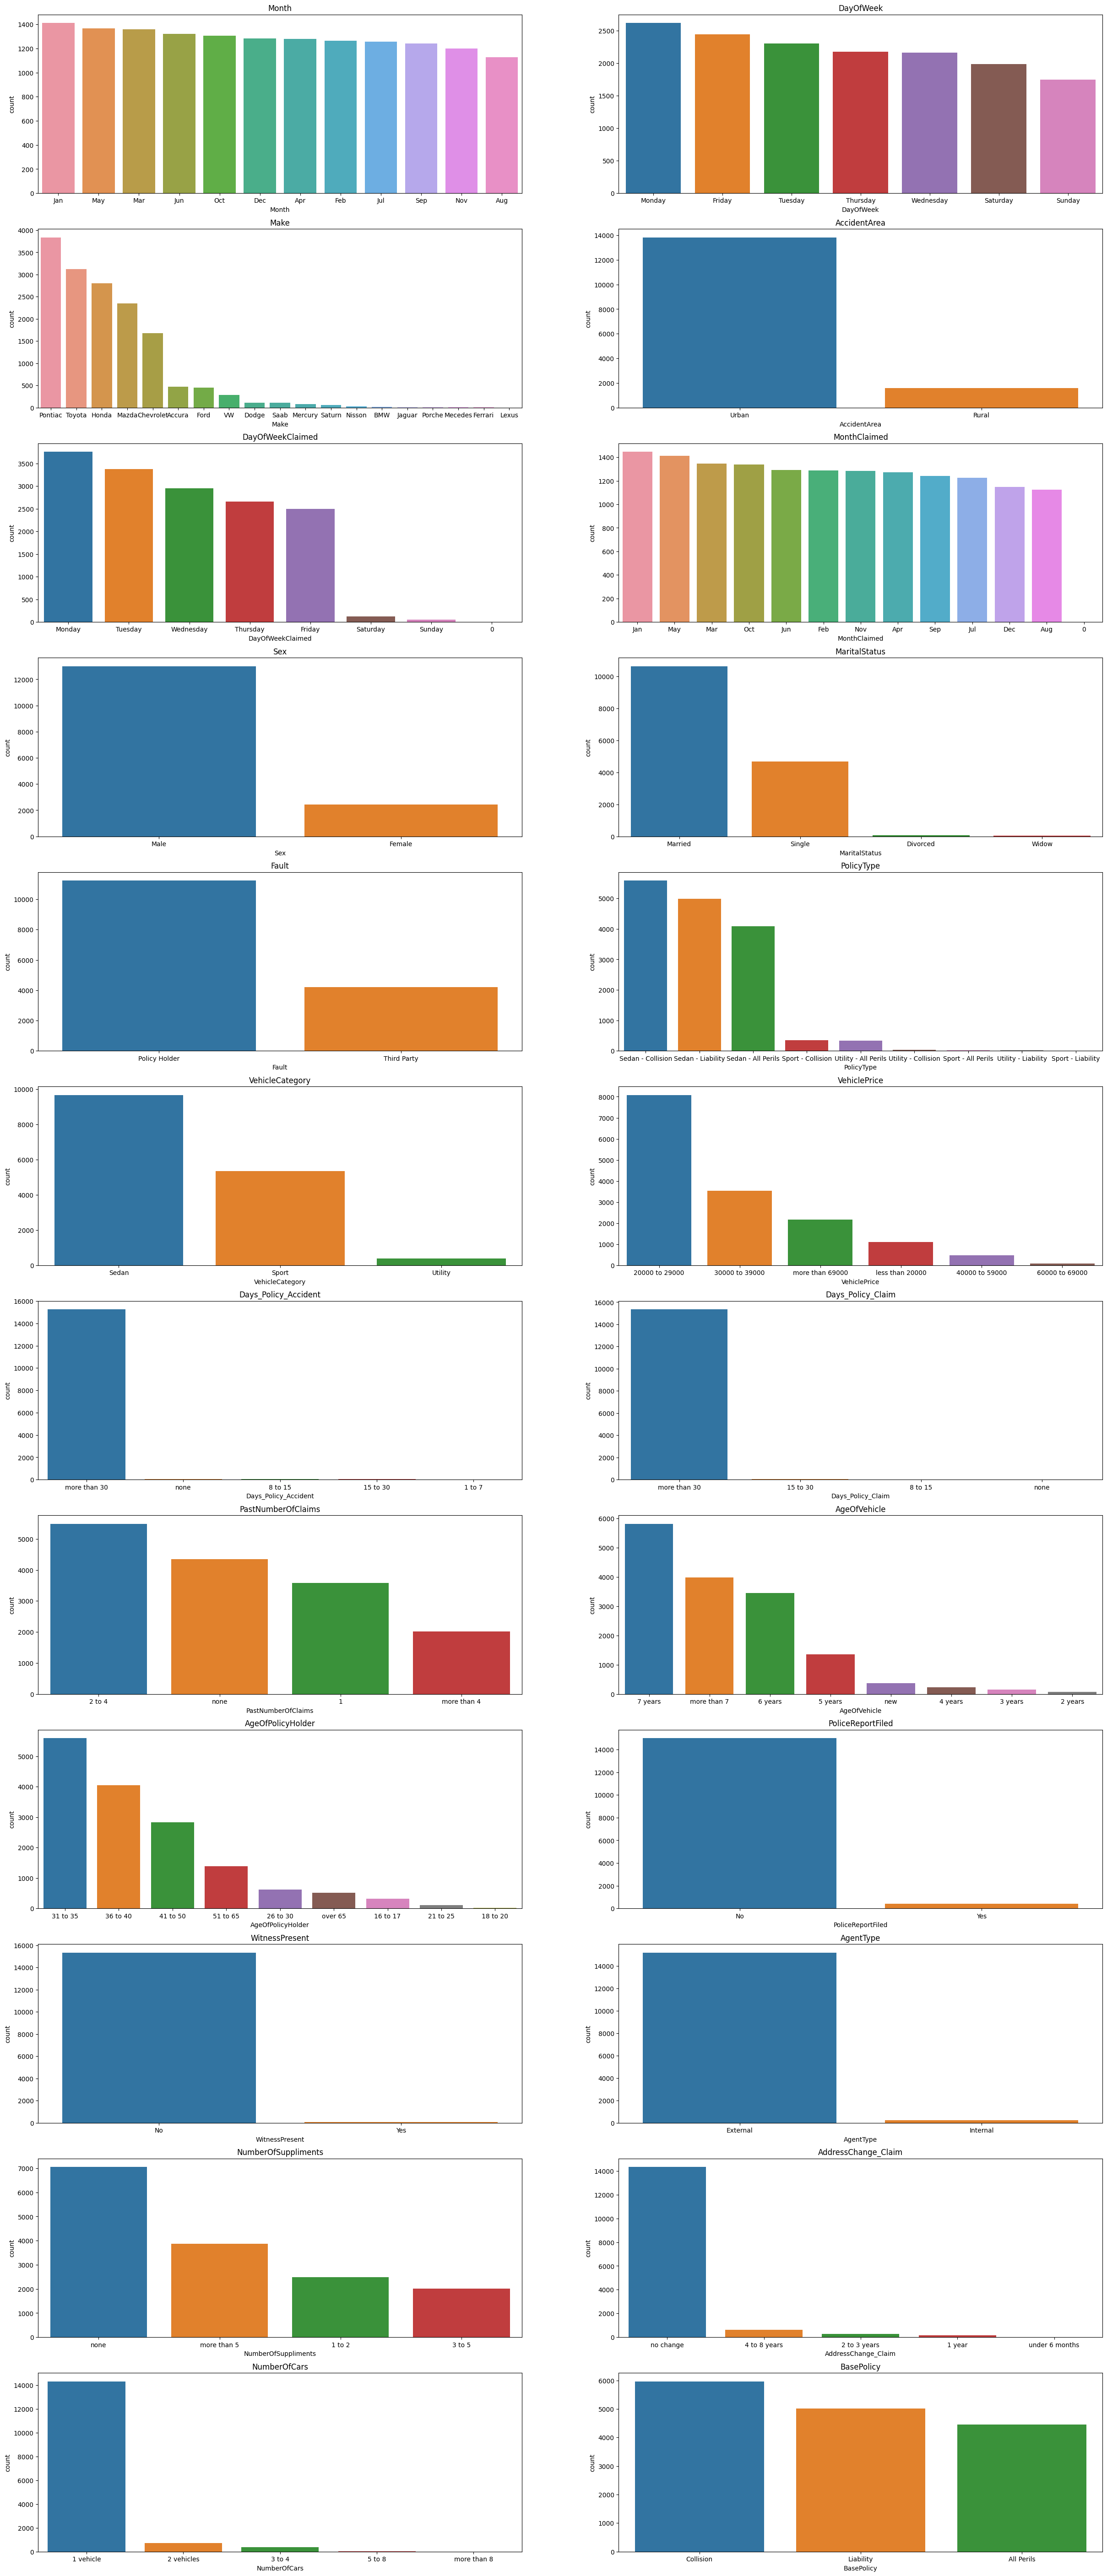

In [ ]:
def plot_categories(df, vars):
  '''
    This function creates multiple plots for certain variables

    Args:
        vars (dict, list or list-like): Variable selection,
        e.g. df.select_dtypes('O').

    Returns:
        Plots (fig): Multiple plots containing the selection
  '''
  from math import ceil
  try:
    filas = ceil(vars.shape[1] / 2)
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (30, filas * 6))
    ax = ax.flat


    for i, a in enumerate(vars):
      sns.countplot(x=str(a), data=df, ax=ax[i], order = df[str(a)].value_counts().index).set(title=a)
    plt.show()
  except Exception:
    capture_error()
    return f

# Explore the categorical variables plotting them.
plot_categories(fraud, fraud.select_dtypes('O'))

**DayOfWeekClaimed** and **MonthClaimed** both have 0 values. This might be null values, let's take a look.  

In [ ]:
fraud['DayOfWeekClaimed'].value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64

In [ ]:
fraud['MonthClaimed'].value_counts()

Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: MonthClaimed, dtype: int64

In [ ]:
# Drop this observation since it is only one and we dont know what does it mean.
rare = fraud[fraud['DayOfWeekClaimed']=='0'].index
fraud = fraud[~fraud.index.isin(rare)]

## Numerical Variables

In [ ]:
# Create a function for exploring all the numerical variables during EDA.
def statistics(vars):
  ''' This function prints summary statistics for the subset selected.
  Args:
      vars (list or list-like): A selection of numerical variables.

  Returns:
      stats (DataFrame): A DataFrame containing summary statistics.
  '''
  try:
    stats = vars.describe().T
    stats['median'] = vars.median()
    stats = stats.iloc[:,[0,1,8,2,3,4,5,6,7]]
  except Exception:
    capture_error()
  return(stats)

statistics(fraud.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
WeekOfMonth,15419.0,2.788637,3.0,1.287611,1.0,2.0,3.0,4.0,5.0
WeekOfMonthClaimed,15419.0,2.694079,3.0,1.259082,1.0,2.0,3.0,4.0,5.0
Age,15419.0,39.858292,38.0,13.488996,0.0,31.0,38.0,48.0,80.0
FraudFound_P,15419.0,0.059861,0.0,0.237237,0.0,0.0,0.0,0.0,1.0
PolicyNumber,15419.0,7710.901680,7711.0,4451.379800,1.0,3856.5,7711.0,11565.5,15420.0
RepNumber,15419.0,8.482846,8.0,4.599798,1.0,5.0,8.0,12.0,16.0
Deductible,15419.0,407.704780,400.0,43.952379,300.0,400.0,400.0,400.0,700.0
DriverRating,15419.0,2.487840,2.0,1.119482,1.0,1.0,2.0,3.0,4.0
Year,15419.0,1994.866528,1995.0,0.803309,1994.0,1994.0,1995.0,1996.0,1996.0


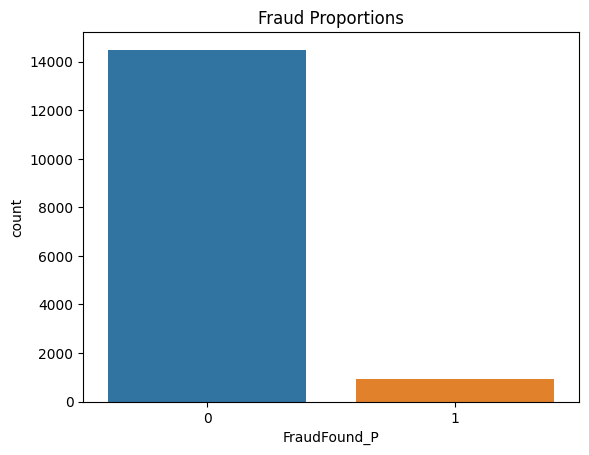

In [ ]:
# Exploring DriverRating
sns.countplot(data=fraud, x='FraudFound_P').set(title='Fraud Proportions')
plt.show()

In [ ]:
fraud['FraudFound_P'].value_counts()

0    14496
1      923
Name: FraudFound_P, dtype: int64

In [ ]:
fraud['FraudFound_P'].value_counts(normalize=True)

0    0.940139
1    0.059861
Name: FraudFound_P, dtype: float64

We have data imbalance in the Fraud variable (target variable), where only 5.98% (923 observations) of the data was detected as **Fraud**. We can:
* Balance both classes.
* Use a ML model that can work with this imbalance, such as anomaly detection models.

When you artificially balance the classes by oversampling or undersampling the data, you create a dataset where anomalies are overrepresented, which can lead to overfitting.

**Because of this, I will use an anomaly detection model.**

**Testing which features correlate with the target variable will help us decide what to do with them.**  

We don't see any significant strong correlation between numerical variables.

# Data preprocessing
We already have the labels we need.

Since we don't have missing data, let's move on to the next step.

# Feature Engineering
We have date features separated in months, weeks and days already.

But the variables of **Month, DayOfWeek, DayOfWeekClaimed and MonthClaimed** are categorical, which lead to high dimensionality because of how many categories each feature has.

These features will work better for the model if they are numerical instead of categorical.


In [ ]:
def map_numerical_months(df, ft_name):
  '''
  This function maps Months features that are categorical and turns them into numerical.

  Args:
    df (DataFrame): The DataFrame of choice.
    ft_name (string): The name of the column in the DataFrame

  Returns:
      df (DataFrame): The same DataFrame with the changes applied.
  '''
  try:
    df[ft_name] = df[ft_name].map({'Jan':1,
                                 'Feb':2,
                                 'Mar':3,
                                 'Apr':4,
                                 'May':5,
                                 'Jun':6,
                                 'Jul':7,
                                 'Aug':8,
                                 'Sep':9,
                                 'Oct':10,
                                 'Nov':11,
                                 'Dec':12})
  except Exception:
    capture_error()
  return df

In [ ]:
map_numerical_months(fraud, 'Month')
map_numerical_months(fraud, 'MonthClaimed')

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,Wednesday,Honda,Urban,Tuesday,1,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,3,Wednesday,Honda,Urban,Monday,1,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,10,5,Friday,Honda,Urban,Thursday,11,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,6,2,Saturday,Toyota,Rural,Friday,7,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,1,5,Monday,Honda,Urban,Tuesday,2,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,11,4,Friday,Toyota,Urban,Tuesday,11,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,11,5,Thursday,Pontiac,Urban,Friday,12,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,11,5,Thursday,Toyota,Rural,Friday,12,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,12,1,Monday,Toyota,Urban,Thursday,12,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
def map_numerical_weekdays(df, ft_name):
  '''
    This function maps Days of the Week features that are categorical and turns them into numerical.

    Args:
      df (DataFrame): The DataFrame of choice.

    Returns:
      df (DataFrame): The same DataFrame with the changes applied.
  '''
  try:
    df[ft_name] = df[ft_name].map({'Monday':1,
                                 'Tuesday':2,
                                 'Wednesday':3,
                                 'Thursday':4,
                                 'Friday':5,
                                 'Saturday':6,
                                 'Sunday':7})

  except Exception:
    capture_error()
  return df

In [ ]:
map_numerical_weekdays(fraud, 'DayOfWeek')
map_numerical_weekdays(fraud, 'DayOfWeekClaimed')

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,Honda,Urban,2,1,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,3,3,Honda,Urban,1,1,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,10,5,5,Honda,Urban,4,11,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,1,5,1,Honda,Urban,2,2,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,11,4,5,Toyota,Urban,2,11,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,11,5,4,Pontiac,Urban,5,12,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,11,5,4,Toyota,Rural,5,12,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,12,1,1,Toyota,Urban,4,12,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
# Changes were made succesfully
statistics(fraud.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Month,15419.0,6.391660,6.0,3.473131,1.0,3.0,6.0,9.0,12.0
WeekOfMonth,15419.0,2.788637,3.0,1.287611,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15419.0,3.808029,4.0,1.979329,1.0,2.0,4.0,5.0,7.0
DayOfWeekClaimed,15419.0,2.828394,3.0,1.453476,1.0,2.0,3.0,4.0,7.0
MonthClaimed,15419.0,6.355730,6.0,3.465167,1.0,3.0,6.0,9.0,12.0
WeekOfMonthClaimed,15419.0,2.694079,3.0,1.259082,1.0,2.0,3.0,4.0,5.0
Age,15419.0,39.858292,38.0,13.488996,0.0,31.0,38.0,48.0,80.0
FraudFound_P,15419.0,0.059861,0.0,0.237237,0.0,0.0,0.0,0.0,1.0
PolicyNumber,15419.0,7710.901680,7711.0,4451.379800,1.0,3856.5,7711.0,11565.5,15420.0
RepNumber,15419.0,8.482846,8.0,4.599798,1.0,5.0,8.0,12.0,16.0


The variable age has a min value of 0. Let's see if we should consider it as a null value.

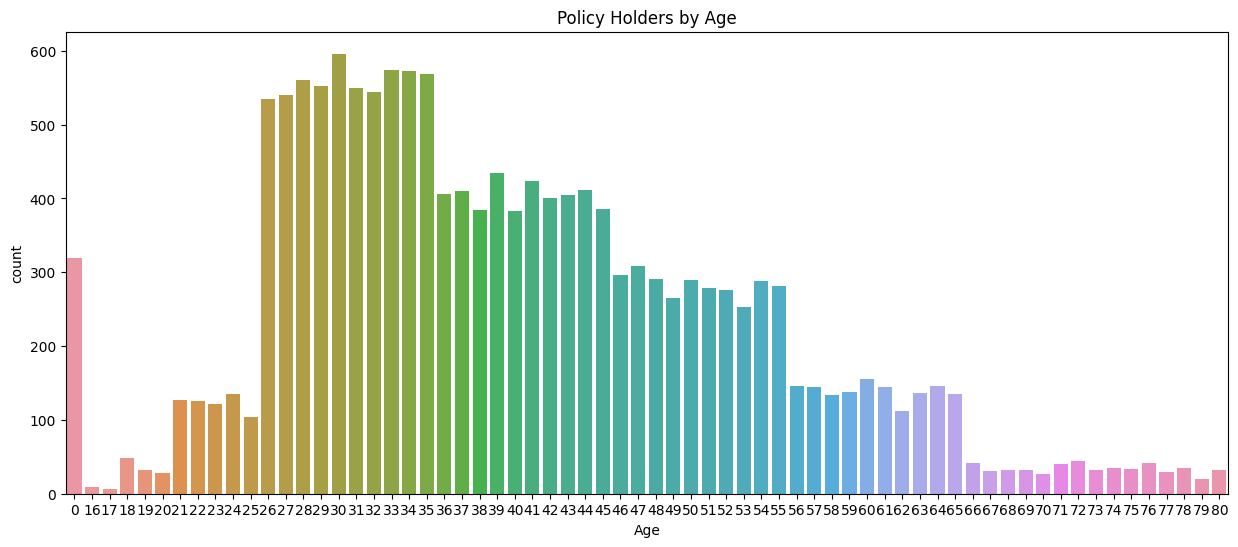

In [ ]:
# Explore Age
f, ax = plt.subplots(figsize = (15, 6))
sns.countplot(data=fraud, x='Age', ax=ax).set(title='Policy Holders by Age')
plt.show()

There are 319 observations that are 'Age' zero, which represent only 2% of the data, therefore we can drop these rows without compromising the integrity of the data.

In [ ]:
fraud[fraud['Age']==0]['Age'].value_counts()

0    319
Name: Age, dtype: int64

In [ ]:
319 / len(fraud)

0.02068876062001427

In [ ]:
# Drop those rows containing Age = 0
rare_age = fraud[fraud['Age'] == 0].index
fraud = fraud[~fraud.index.isin(rare_age)]

# Make sure changes were made
fraud['Age'].describe()

count    15100.000000
mean        40.700331
std         12.309493
min         16.000000
25%         31.000000
50%         39.000000
75%         49.000000
max         80.000000
Name: Age, dtype: float64

# Feature selection
We are going to use the Random Forest Classification Model Importance attribute to know which features should we keep.

In [ ]:
# Create a copy of the original DataFrame
fraud_copy = fraud.copy()
ml_df = pd.get_dummies(fraud_copy)
ml_df.head()

# Set X and y
X = ml_df.drop(columns='FraudFound_P')
y = ml_df['FraudFound_P']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split in trainig and testing sets
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
rfc_ft_sel = RandomForestClassifier()

# Fit
rfc_ft_sel.fit(X_train_ft, y_train_ft)

RandomForestClassifier()

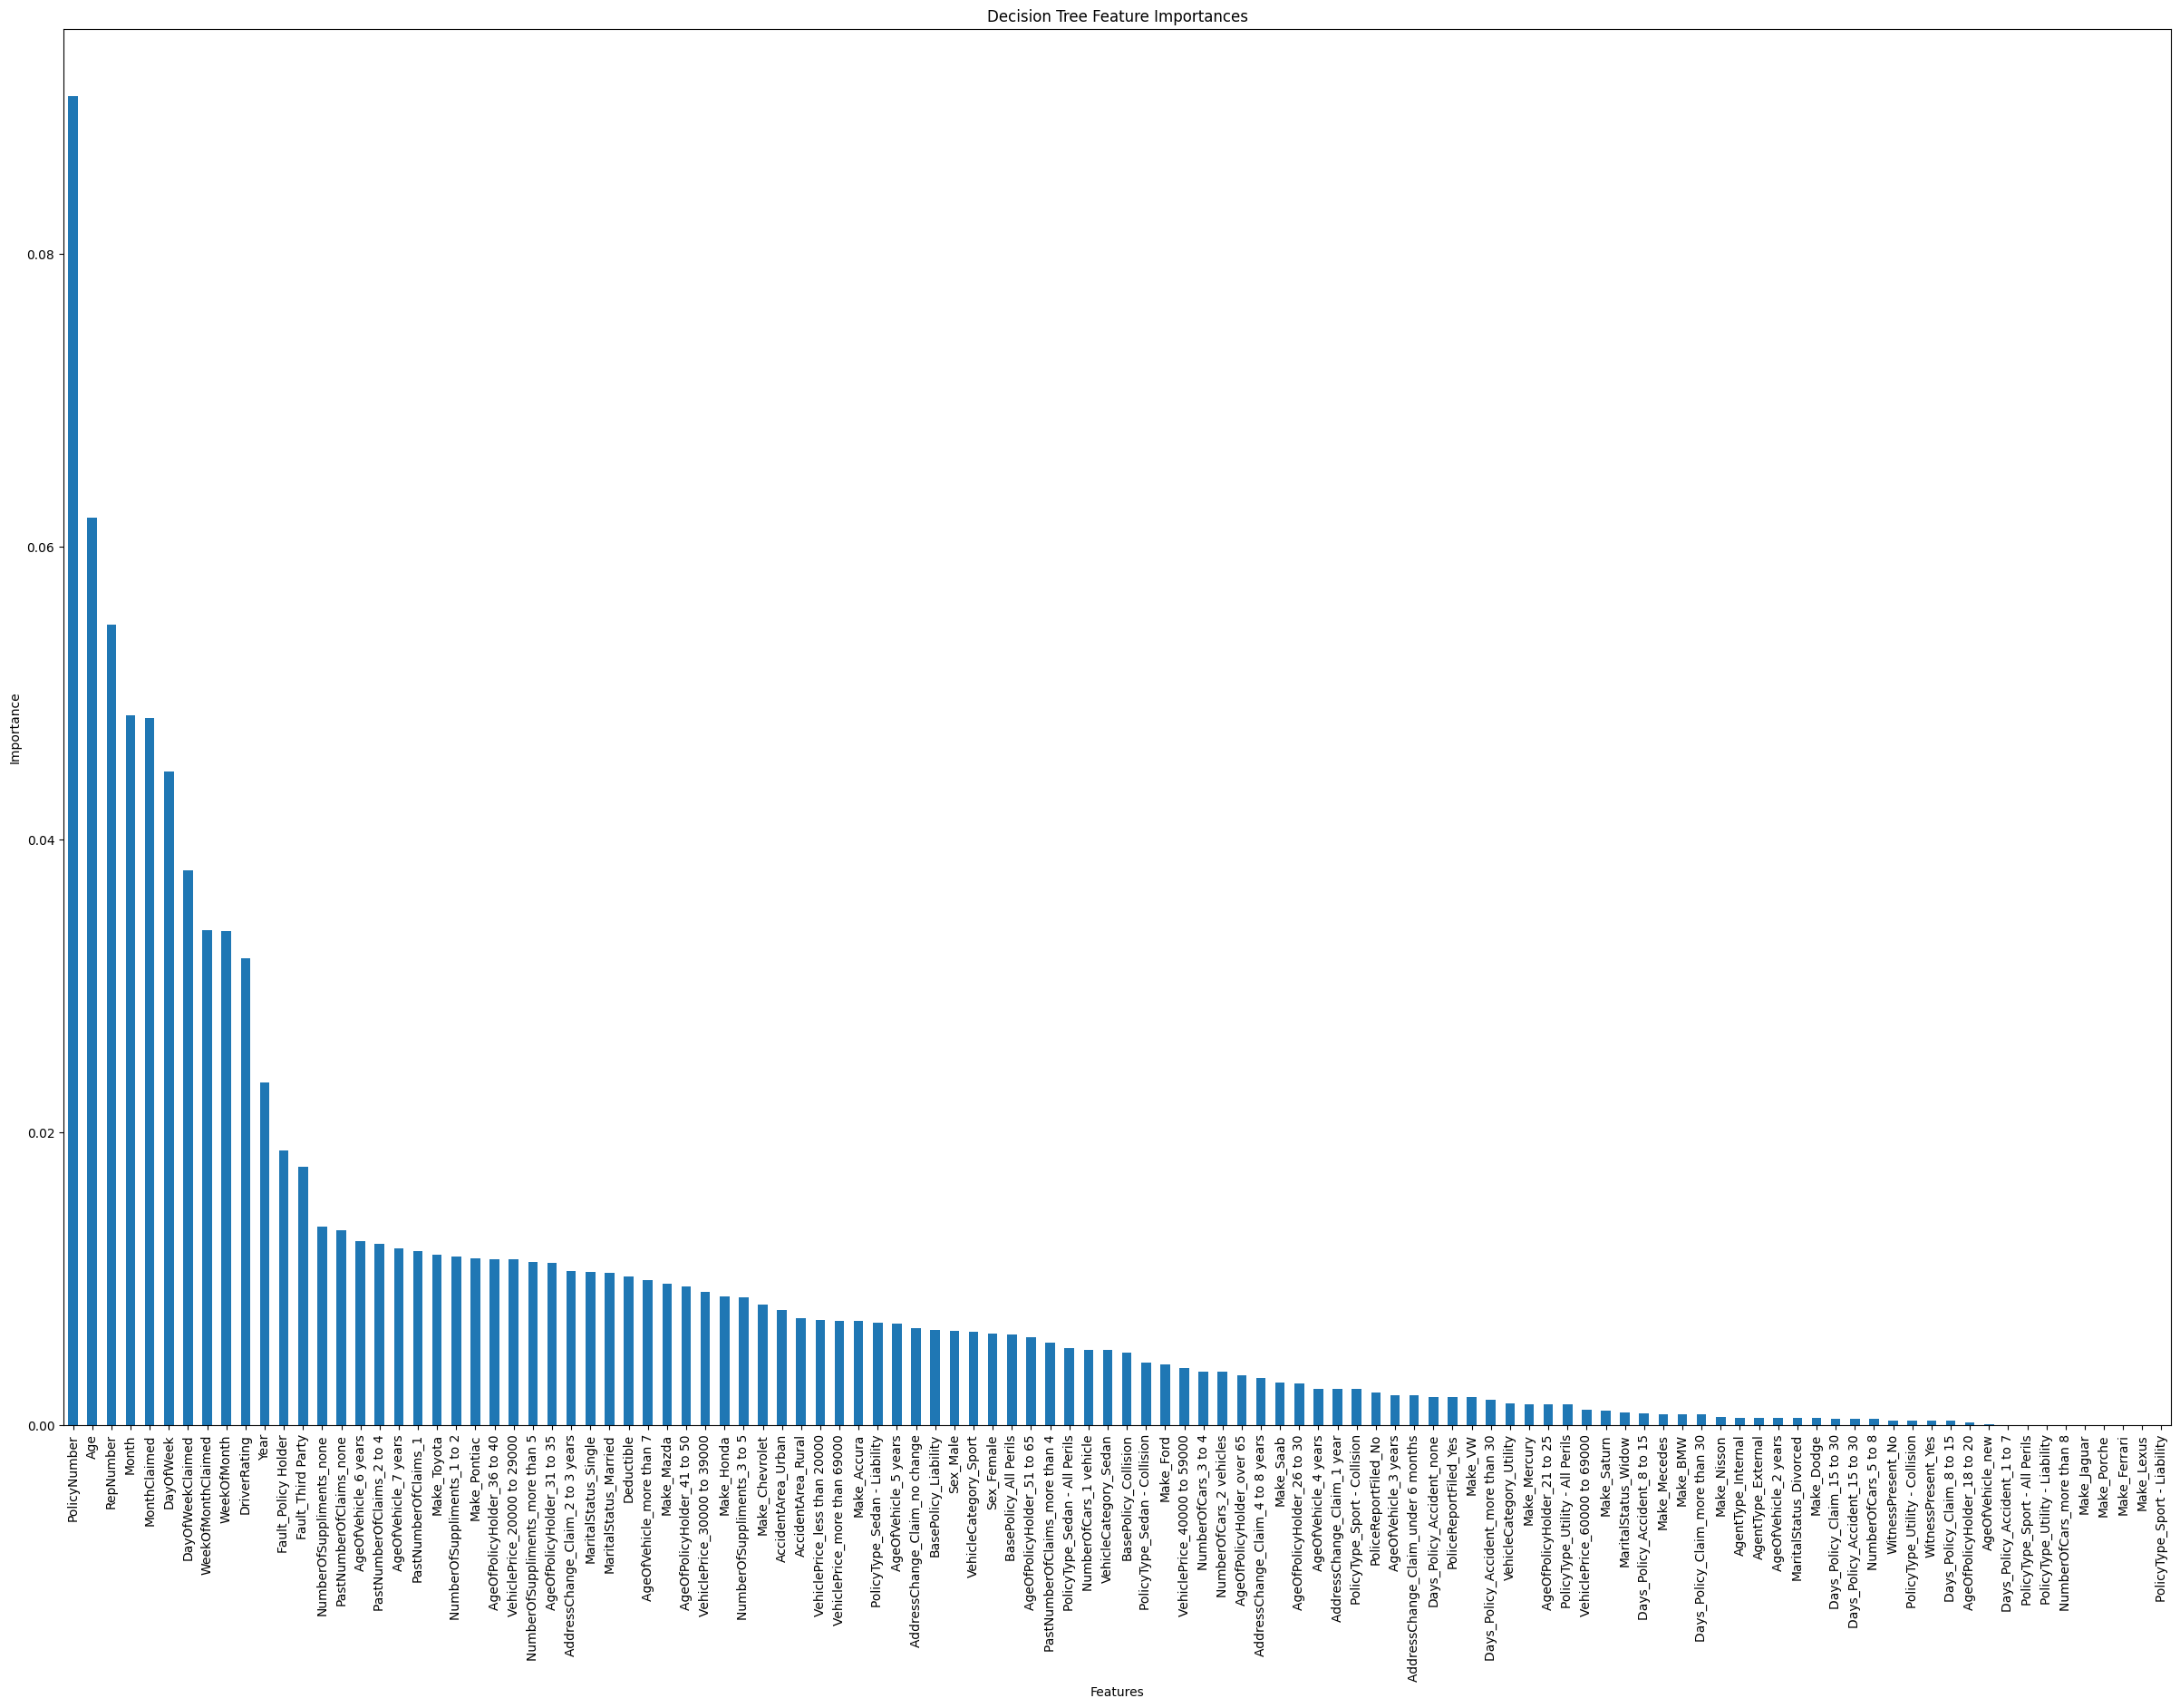

In [ ]:
# Plot feature importances.
a = pd.Series(rfc_ft_sel.feature_importances_,index = X_test_ft.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

**PolicyNumber:** Even though it is placed with high importance, based on domain knowledge, we could argue that this feature could only have this importance because of:
* The PolicyNumber is correlated with fraud, which could mean that more frauds were made as the number of PolicyNumber increases or decreases. If the PolicyNumber increases with time (its assigned overtime) it means that more and more frauds are made now than before and viceversa.

Let's use an ANOVA test to compare means across Policies. This will help us know if the mean "PolicyNumber" of fraud transactions are significantly higher compared to the No Fraud ones.

The most likely outcome is to drop PolicyNumber, so we dont train the model with PolicyNumber. But, let's explore first if theres any relationship between this feature and Frauds.

Hypothesis:
* PolicyNumber is assigned overtime
* And because of that, fraudulent transactions would have a higher PolicyNumber mean.

Lets observe the mean of PolicyNumber by Fraudulent and non-Fraudulent claims.

In [ ]:
a = fraud.groupby('FraudFound_P')['PolicyNumber'].describe()
a

,count,mean,std,min,25%,50%,75%,max
FraudFound_P,,,,,,,,
0,14208.0,7742.116202,4444.828726,1.0,3895.75,7762.5,11599.25,15419.0
1,892.0,7511.190583,4397.696836,53.0,3776.75,7273.5,11128.00,15420.0


It seems that the mean of PolicyNumber is lower with fraudulent claims. Let's explore more.

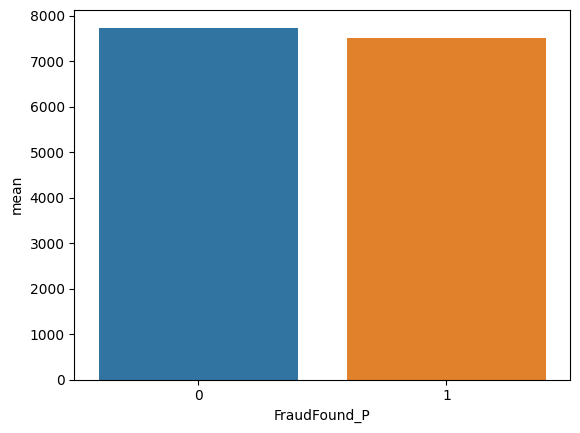

In [ ]:
sns.barplot(data=a, x=a.index, y='mean')
plt.show()

### Hypothesis Testing

* H0: There is no difference in "PolicyNumber" means across Fraud and No Fraud transactions.  
  * Reject if p-value < alpha
  * Fail to reject if if p-value > alpha
* H1: At least one mean is different across Fraud and No Fraud transactions.

**Alpha = 0.05**

In [ ]:
pip install --upgrade pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=a12fadf524b2d01b5fee563bbe43f2bf60aa126c0fd387b78bc7d6a3cc844aaf
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pingouin as pg

# Set alpha
alpha_0_05 = 0.05

# ANOVA
anova_policies = pg.anova(data=fraud, dv='PolicyNumber', between='FraudFound_P')
anova_policies

,Source,ddof1,ddof2,F,p-unc,np2
0,FraudFound_P,1,15098,2.268277,0.132068,0.00015


In [ ]:
anova_policies['p-unc'] < alpha_0_05

0    False
Name: p-unc, dtype: bool

**Fail to reject H0, which means that theres not enough evidence that theres a significant difference between means.**

---

Are Policy Numbers assigned through time or they are randomly assigned?

In [ ]:
fraud.sort_values(by='PolicyNumber', ascending=False)[['Year', 'PolicyNumber']]

,Year,PolicyNumber
15419,1996,15420
15418,1996,15419
15417,1996,15418
15416,1996,15417
15415,1996,15416
...,...,...
4,1994,5
3,1994,4
2,1994,3
1,1994,2


They seem to be assigned secuentially. The graph below proves that the number of Policy is assigned overtime, since the mean is higher each year.

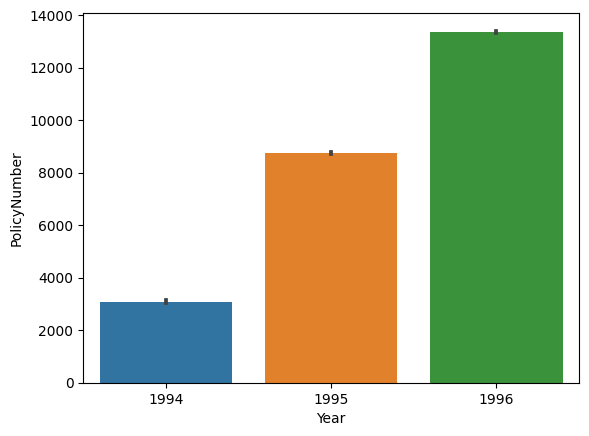

In [ ]:
sns.barplot(data=fraud, x='Year', y='PolicyNumber')
plt.show()

## Fraud

It seems that Frauds are decreasing through time, as well as transactions overall.

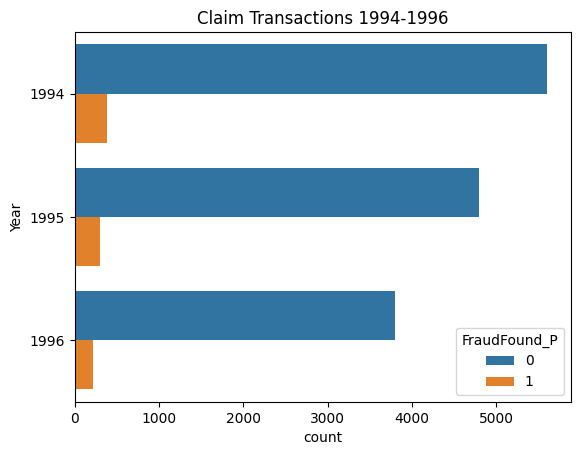

In [ ]:
sns.countplot(data=fraud, y='Year', hue='FraudFound_P').set(title='Claim Transactions 1994-1996')
plt.show()

So we can conclude that PolicyNumber helps the algorithm predict Fraud, because, a lower policy number means its an older policy, and there were less frauds at that time than today.

But I decide to drop **PolicyNumber** because its not a trend we want our model to learn, mainly due to future changes in fraud transactions.

Lets take a minute to understand what would really mean to train our model with this feature. It could mean that the newer the policy the more likely the model would predict fraud, which is something we dont want right?... right?

In [ ]:
# Drop it like its hot!
fraud = fraud.drop(columns='PolicyNumber')

# Pulling the thread

**Which sex commits more fraud?**

Male policy holders commit more frauds.

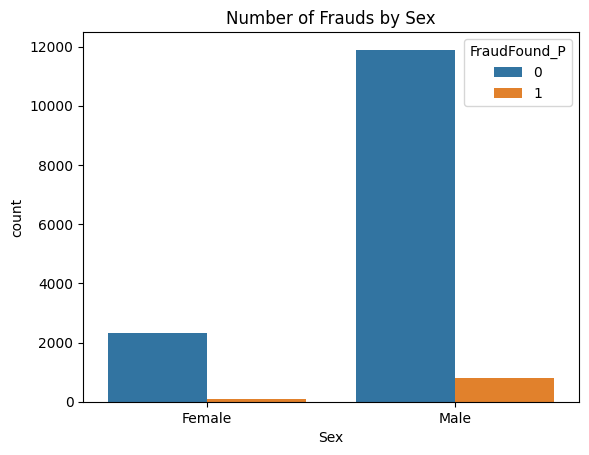

In [ ]:
sns.countplot(data=fraud, x='Sex', hue='FraudFound_P').set(title='Number of Frauds by Sex')
plt.show()

In [ ]:
fraud.groupby('FraudFound_P')['Sex'].value_counts(normalize=True)

FraudFound_P  Sex   
0             Male      0.837064
              Female    0.162936
1             Male      0.882287
              Female    0.117713
Name: Sex, dtype: float64

**Any specific car commits more fraud?**

Pontiac, Toyota and Honda are on the top of the list.

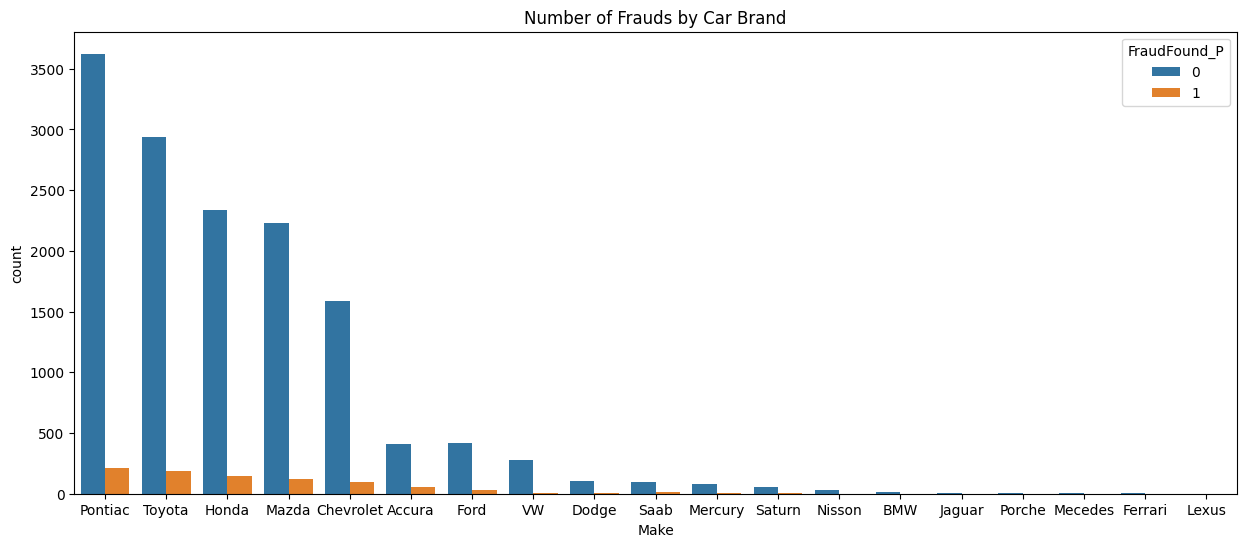

In [ ]:
f1, ax1 = plt.subplots(figsize = (15, 6))
sns.countplot(data=fraud, x='Make', hue='FraudFound_P', ax=ax1, order = fraud['Make'].value_counts().index)\
    .set(title='Number of Frauds by Car Brand')
plt.show()

In [ ]:
fraud.groupby('FraudFound_P')['Make'].value_counts(normalize=True)

FraudFound_P  Make     
0             Pontiac      0.255068
              Toyota       0.206574
              Honda        0.164274
              Mazda        0.157024
              Chevrolet    0.111698
              Ford         0.029350
              Accura       0.029068
              VW           0.019355
              Dodge        0.007461
              Saab         0.006827
              Mercury      0.005419
              Saturn       0.003660
              Nisson       0.002041
              BMW          0.000985
              Jaguar       0.000422
              Porche       0.000352
              Mecedes      0.000211
              Ferrari      0.000141
              Lexus        0.000070
1             Pontiac      0.238789
              Toyota       0.208520
              Honda        0.165919
              Mazda        0.137892
              Chevrolet    0.105381
              Accura       0.066143
              Ford         0.036996
              Saab         0.012332
    

**Which Accident Area is more common for fraud?**

Urban Areas are more common for frauds.

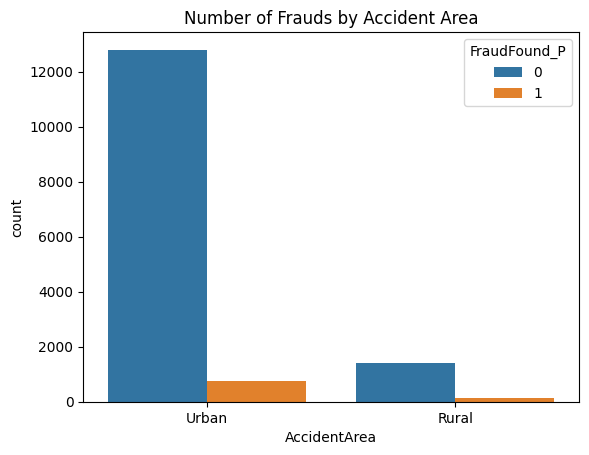

In [ ]:
sns.countplot(data=fraud, x='AccidentArea', hue='FraudFound_P', order = fraud['AccidentArea'].value_counts().index)\
    .set(title='Number of Frauds by Accident Area')
plt.show()

In [ ]:
fraud.groupby('FraudFound_P')['AccidentArea'].value_counts(normalize=True)

FraudFound_P  AccidentArea
0             Urban           0.900408
              Rural           0.099592
1             Urban           0.853139
              Rural           0.146861
Name: AccidentArea, dtype: float64

**Usually, are there witnesses for fraudulent claims?**

Almost all observations do not have a witness, so we can not say that witnesses make a difference in frauds.

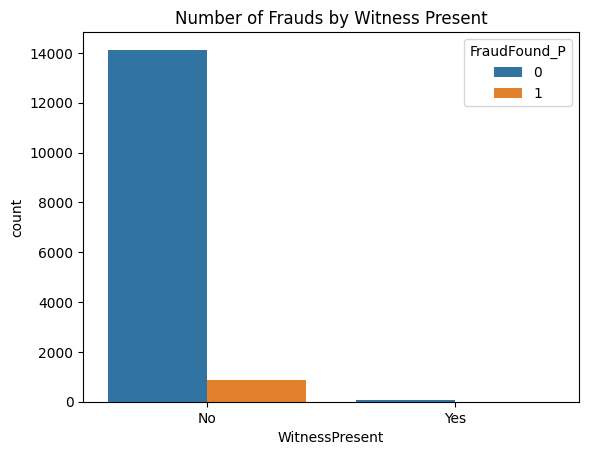

In [ ]:
sns.countplot(data=fraud, x='WitnessPresent', hue='FraudFound_P', order = fraud['WitnessPresent'].value_counts().index)\
    .set(title='Number of Frauds by Witness Present')
plt.show()


**Higher Vehicle Prices, more frauds?**

421 frauds (47.19\% of all) happen with cheap cars(\$20,000 to \$29,000 USD). Frauds tend to reduce as price increases.

Also, most of the policies are in this Vehicle Price Range.


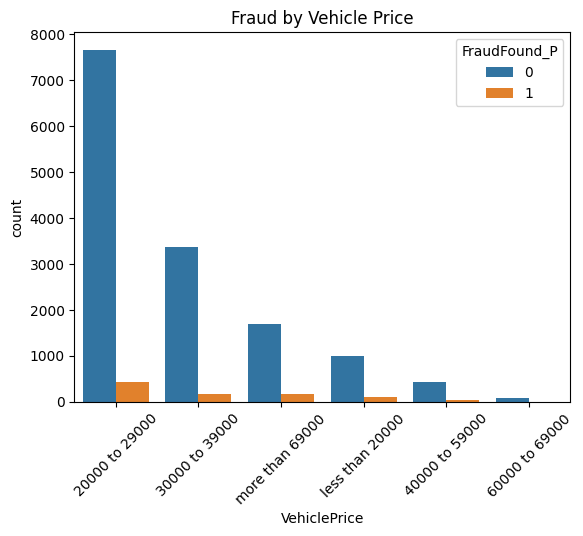

In [ ]:
sns.countplot(data=fraud, x='VehiclePrice', hue='FraudFound_P', order = fraud['VehiclePrice'].value_counts().index)\
       .set(title='Fraud by Vehicle Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
fraud.groupby('FraudFound_P')['VehiclePrice'].value_counts(normalize=True)

FraudFound_P  VehiclePrice   
0             20000 to 29000     0.538992
              30000 to 39000     0.236275
              more than 69000    0.118806
              less than 20000    0.069820
              40000 to 59000     0.030265
              60000 to 69000     0.005842
1             20000 to 29000     0.471973
              30000 to 39000     0.196188
              more than 69000    0.177130
              less than 20000    0.115471
              40000 to 59000     0.034753
              60000 to 69000     0.004484
Name: VehiclePrice, dtype: float64

In [ ]:
fraud[fraud['FraudFound_P']==1].groupby('VehiclePrice')\
                                ['FraudFound_P'].value_counts()\
                                 .sort_values(ascending=False)

VehiclePrice     FraudFound_P
20000 to 29000   1               421
30000 to 39000   1               175
more than 69000  1               158
less than 20000  1               103
40000 to 59000   1                31
60000 to 69000   1                 4
Name: FraudFound_P, dtype: int64

In [ ]:
# How many frauds are in the $20,000 to $29,000 USD Vehicle Price Range
421 / len(fraud[fraud['FraudFound_P']==1])

0.47197309417040356

**Are older vehicles more likely to suffer fraud?**

We observe more frauds as the vehicle gets older. This means that new vehicles are not likely to make a fraudulent claim.

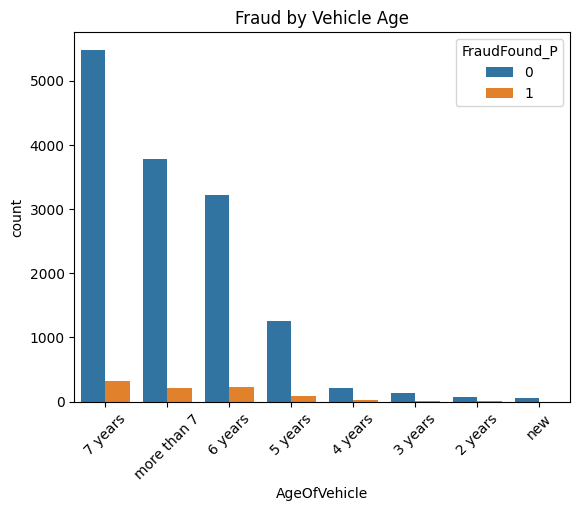

In [ ]:
sns.countplot(data=fraud, x='AgeOfVehicle', hue='FraudFound_P', order = fraud['AgeOfVehicle'].value_counts().index)\
       .set(title='Fraud by Vehicle Age')
plt.xticks(rotation=45)
plt.show()

**Which age group is more likely to submit a fraudulent claim?**

31-35 y/o Policy Holders are the ones that commit more fraud.

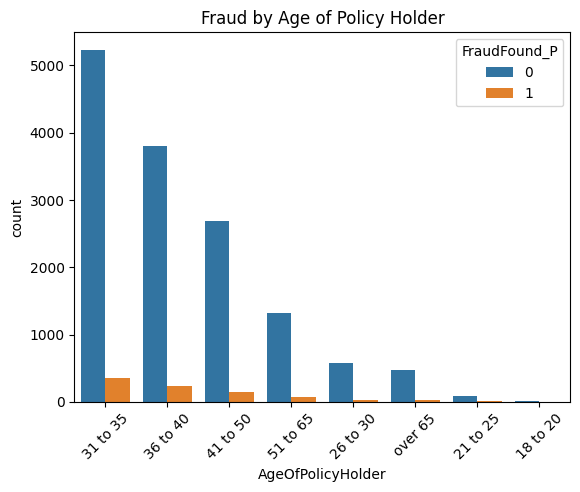

In [ ]:
sns.countplot(data=fraud, x='AgeOfPolicyHolder', hue='FraudFound_P', order = fraud['AgeOfPolicyHolder'].value_counts().index)\
       .set(title='Fraud by Age of Policy Holder')
plt.xticks(rotation=45)
plt.show()

**Is fraud happening during certain seasons?**

Fraud looks to be equally distributed by Day, Week and Month.

Claims are equally distributed throught the year.

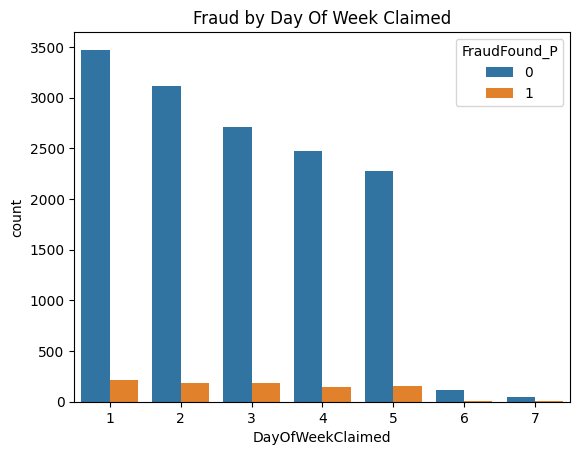

In [ ]:
sns.countplot(data=fraud, x='DayOfWeekClaimed', hue='FraudFound_P', order = fraud['DayOfWeekClaimed'].value_counts().index)\
       .set(title='Fraud by Day Of Week Claimed')
plt.show()

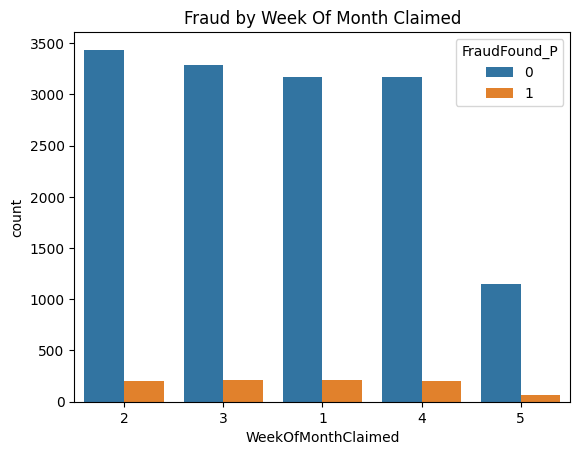

In [ ]:
sns.countplot(data=fraud, x='WeekOfMonthClaimed', hue='FraudFound_P', order = fraud['WeekOfMonthClaimed'].value_counts().index)\
       .set(title='Fraud by Week Of Month Claimed')
plt.show()

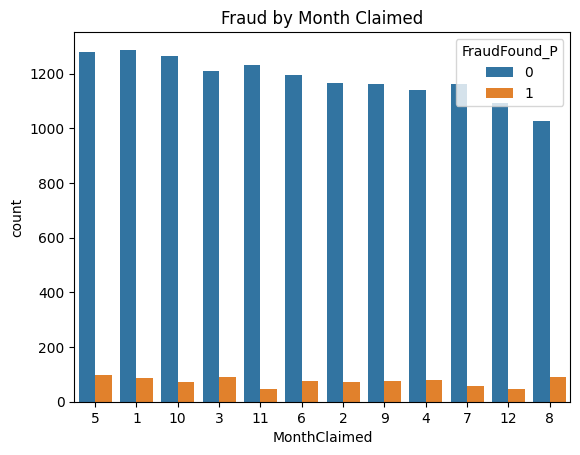

In [ ]:
sns.countplot(data=fraud, x='MonthClaimed', hue='FraudFound_P', order = fraud['MonthClaimed'].value_counts().index)\
       .set(title='Fraud by Month Claimed')
plt.show()

**Is the policy type increasing Frauds?**

Types of insurance Base Policies.

* **Collision**: It helps pay to repair or replace your car if it's damaged in an accident with another vehicle or object, such as a fence or a tree.
* **Liability**: It helps cover medical and legal fees if you're held legally responsible for someone else's injury, or damage to someone else's property.
* **All perils**: It is an insurance policy that would cover all the risks unless these are explicitly excluded in the policy text


Liability Base Policies have the least amount of frauds out of the 3 types. This could mean that most of Policy Holders that have a Liability Base Policy are better covered and therefore they feel less preassure to commit fraud.

But I think that is easier to commit fraud when you hit a Fence or a tree (Collision) rather than another person's car, even more, when someone else got hurt.

**So, I think that fraud is harder to commit Fraud for "Liability" Policy Holders because you are adding another variable; another person's injury or damage to their property.**

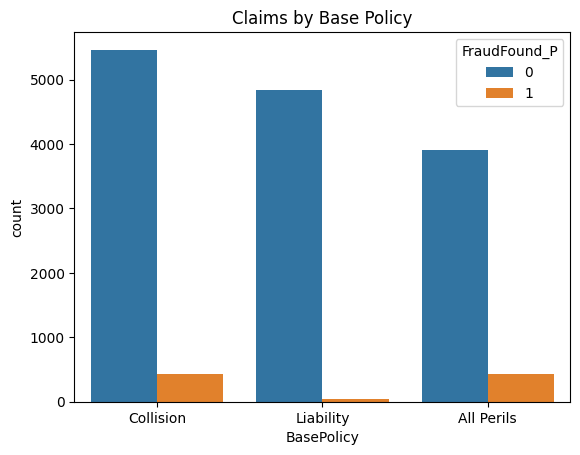

In [ ]:
sns.countplot(data=fraud, x='BasePolicy', hue='FraudFound_P', order = fraud['BasePolicy'].value_counts().index)\
       .set(title='Claims by Base Policy')
plt.show()

**What type of cars suffer more fraud?**

Sedans suffer from fraud more than Sport and Utility Vehicles, but let's acknowledge the class imbalance between the categories..

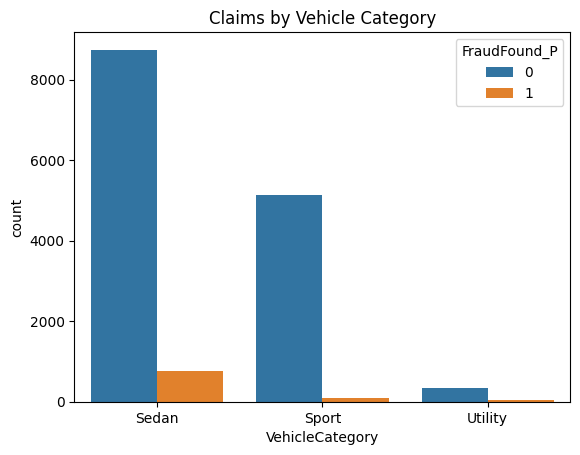

In [ ]:
sns.countplot(data=fraud, x='VehicleCategory', hue='FraudFound_P', order = fraud['VehicleCategory'].value_counts().index)\
       .set(title='Claims by Vehicle Category')
plt.show()

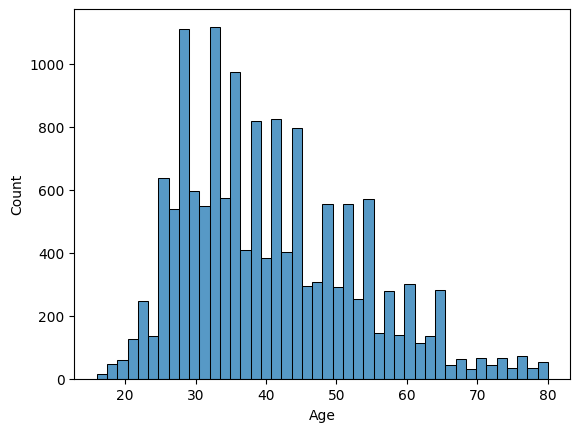

In [ ]:
sns.histplot(data=fraud, x='Age')
plt.show()

In [ ]:
fraud['Age'].describe()

count    15100.000000
mean        40.700331
std         12.309493
min         16.000000
25%         31.000000
50%         39.000000
75%         49.000000
max         80.000000
Name: Age, dtype: float64

# Train Model
We are going to test the next models with balanced and imbalanced datasets, and then, test their performance.

* Logistic Regression
* Random Forest
* SVM
* Neural Network

In [ ]:
# Make a copy of the original DataFrame (again)
fraud_copy = fraud.copy()
ml_df = pd.get_dummies(fraud_copy)

In [ ]:
# Make FraudFound_P	the last column
ml_df = ml_df.reindex(columns = [col for col in ml_df.columns if col != 'FraudFound_P'] + ['FraudFound_P'])
ml_df.head()

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,...,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,FraudFound_P
0,12,5,3,2,1,1,21,12,300,1,...,0,0,0,1,0,0,0,0,1,0
1,1,3,3,1,1,4,34,15,400,4,...,0,1,0,0,0,0,0,1,0,0
2,10,5,5,4,11,2,47,7,400,3,...,0,1,0,0,0,0,0,1,0,0
3,6,2,6,5,7,1,65,4,400,2,...,0,1,0,0,0,0,0,0,1,0
4,1,5,1,2,2,2,27,3,400,1,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Shuffle the data
ml_df = ml_df.sample(frac=1, random_state=123)

In [ ]:
train, test, val = ml_df[:10000] , ml_df[10000:12500], ml_df[12500:]
train['FraudFound_P'].value_counts(), test['FraudFound_P'].value_counts(), val['FraudFound_P'].value_counts()

(0    9444
 1     556
 Name: FraudFound_P, dtype: int64,
 0    2331
 1     169
 Name: FraudFound_P, dtype: int64,
 0    2433
 1     167
 Name: FraudFound_P, dtype: int64)

In [ ]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()

In [ ]:
X_train, y_train = train_np[:, :-1], train_np[:, -1]
X_test, y_test = test_np[:, :-1], test_np[:, -1]
X_val, y_val = val_np[:, :-1], val_np[:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((10000, 109), (10000,), (2500, 109), (2500,), (2600, 109), (2600,))

In [ ]:
# Import Models
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

## Training with class imbalance

### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9444

We have really good metrics for Not Fraudulent transactions, but poor Fraud detection. This is reasonable as we have very few Fraudulent transactions to train the model on.

We can't trust precision in imbalanced datasets, because as you can see we correctly predict **Not Fraud** which is most of the observations.

In [ ]:
logreg_report = classification_report(y_val, logreg.predict(X_val), target_names=['Not Fraud', 'Fraud'])
print(logreg_report)

              precision    recall  f1-score   support

   Not Fraud       0.94      1.00      0.97      2433
       Fraud       0.00      0.00      0.00       167

    accuracy                           0.94      2600
   macro avg       0.47      0.50      0.48      2600
weighted avg       0.88      0.94      0.90      2600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

1.0

Again, we can't trust accuracy. Really good precision, poor recall.

In [ ]:
rfc_report = classification_report(y_val, rfc.predict(X_val), target_names=['Not Fraud', 'Fraud'])
print(rfc_report)

              precision    recall  f1-score   support

   Not Fraud       0.94      1.00      0.97      2433
       Fraud       0.00      0.00      0.00       167

    accuracy                           0.94      2600
   macro avg       0.47      0.50      0.48      2600
weighted avg       0.88      0.94      0.90      2600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Neural Network
Shallow Neural Network

In [ ]:
shallow_nn = Sequential()
shallow_nn.add(InputLayer((X_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 220       
                                                                 
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 231
Trainable params: 227
Non-trainable params: 4
_________________________________________________________________


In [ ]:
shallow_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
307/313 [============================>.] - ETA: 0s - loss: 0.6273 - accuracy: 0.8033

313/313 [==============================] - 4s 10ms/step - loss: 0.6241 - accuracy: 0.8050 - val_loss: 0.7876 - val_accuracy: 0.9358
Epoch 2/5
305/313 [============================>.] - ETA: 0s - loss: 0.3439 - accuracy: 0.9325

313/313 [==============================] - 2s 7ms/step - loss: 0.3419 - accuracy: 0.9330 - val_loss: 0.7031 - val_accuracy: 0.4596
Epoch 3/5
297/313 [===========================>..] - ETA: 0s - loss: 0.2410 - accuracy: 0.9438

313/313 [==============================] - 2s 5ms/step - loss: 0.2387 - accuracy: 0.9444 - val_loss: 0.2396 - val_accuracy: 0.9358
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2044 - accuracy: 0.9443 - val_loss: 20.7521 - val_accuracy: 0.0642
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1933 - accuracy: 0.9441 - val_loss: 0.4291 - val_accuracy: 0.9358


In [ ]:
def neural_network_pred(model, x):
  '''
    This function gives the neural network output the necessary format to create
    a classification report.

    Args:
        model (model): The model variable
        x (array, array like): The X_train, X_test or X_val split.

    Returns:
        pred (numpy array): 0 or 1 predictions in a numpy array.
  '''
  pred = (model.predict(x).flatten() > 0.5).astype(int)
  return pred

In [ ]:
neural_network_pred(shallow_nn, X_val)

82/82 [==============================] - 0s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

We see again high precision, but low recall. **This means the model detects very few positive cases out of all positive cases (recall). But all of those that the model catches, are actually fraud (precision).**

In [ ]:
nn_report = classification_report(y_val, neural_network_pred(shallow_nn, X_val), target_names=['Not Fraud', 'Fraud'])
print(nn_report)

82/82 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       0.94      1.00      0.97      2433
       Fraud       0.00      0.00      0.00       167

    accuracy                           0.94      2600
   macro avg       0.47      0.50      0.48      2600
weighted avg       0.88      0.94      0.90      2600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVC


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.9444

We see the same scenario again, high precision and low recall.

In [ ]:
svc_report = classification_report(y_val, svc.predict(X_val), target_names=['Not Fraud', 'Fraud'])
print(svc_report)

              precision    recall  f1-score   support

   Not Fraud       0.94      1.00      0.97      2433
       Fraud       0.00      0.00      0.00       167

    accuracy                           0.94      2600
   macro avg       0.47      0.50      0.48      2600
weighted avg       0.88      0.94      0.90      2600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Training with class balance.

In [ ]:
ml_df.head()

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,...,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,FraudFound_P
8211,5,1,1,5,5,1,55,3,500,4,...,0,1,0,0,0,0,0,0,1,0
6071,6,4,7,4,6,5,43,13,400,2,...,0,1,0,0,0,0,0,0,1,0
4339,7,3,3,5,7,5,29,5,400,1,...,0,1,0,0,0,0,0,0,1,0
8566,12,5,6,4,1,1,26,13,400,3,...,0,1,0,0,0,0,1,0,0,0
12385,12,1,1,1,12,1,32,16,400,4,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Balance the classes
not_frauds = ml_df[ml_df['FraudFound_P']==0]
frauds = ml_df[ml_df['FraudFound_P']==1]
print(not_frauds['FraudFound_P'].value_counts(), '\n', frauds['FraudFound_P'].value_counts())

0    14208
Name: FraudFound_P, dtype: int64 
 1    892
Name: FraudFound_P, dtype: int64


In [ ]:
ml_df_b = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=123)])
ml_df_b

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,...,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,FraudFound_P
11121,3,5,3,2,6,2,41,6,400,1,...,0,1,0,0,0,0,1,0,0,1
4228,6,1,5,3,6,2,80,2,400,1,...,0,1,0,0,0,0,1,0,0,1
6601,9,4,5,5,10,4,27,16,400,4,...,0,0,0,1,0,0,0,1,0,1
9203,1,2,2,5,1,3,35,6,400,2,...,0,1,0,0,0,0,0,1,0,1
700,1,3,3,2,2,1,33,8,400,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,10,5,1,1,10,5,32,15,400,2,...,0,1,0,0,0,0,0,0,1,0
4985,9,1,1,1,9,1,60,5,400,3,...,0,1,0,0,0,0,1,0,0,0
8853,9,2,5,5,9,3,32,2,400,3,...,0,1,0,0,0,0,0,1,0,0
15235,2,3,2,3,2,3,33,15,400,3,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Shuffle the data
ml_df_b = ml_df_b.sample(frac=1, random_state=123)

In [ ]:
train_b, test_b, val_b = ml_df_b[:1000] , ml_df_b[1000:1400], ml_df_b[1400:]
train_b['FraudFound_P'].value_counts(), test_b['FraudFound_P'].value_counts(), val_b['FraudFound_P'].value_counts()

(0    504
 1    496
 Name: FraudFound_P, dtype: int64,
 1    202
 0    198
 Name: FraudFound_P, dtype: int64,
 1    194
 0    190
 Name: FraudFound_P, dtype: int64)

In [ ]:
train_b_np, test_b_np, val_b_np = train_b.to_numpy(), test_b.to_numpy(), val_b.to_numpy()

In [ ]:
X_train_b, y_train_b = train_b_np[:, :-1], train_b_np[:, -1]
X_test_b, y_test_b = test_b_np[:, :-1], test_b_np[:, -1]
X_val_b, y_val_b = val_b_np[:, :-1], val_b_np[:, -1]
X_train_b.shape, y_train_b.shape, X_test_b.shape, y_test_b.shape, X_val_b.shape, y_val_b.shape

((1000, 109), (1000,), (400, 109), (400,), (384, 109), (384,))

### Logistic Regression

In [ ]:
logreg_b = LogisticRegression()
logreg_b.fit(X_train_b, y_train_b)
logreg_b.score(X_train_b, y_train_b)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.715

Now we have something.
We could argue that these are balanced metrics for detecting fraud and not fraud transactions. Still we are not happy with this model.

In [ ]:
logreg_report_b = classification_report(y_val_b, logreg_b.predict(X_val_b), target_names=['Not Fraud', 'Fraud'])
print(logreg_report_b)

              precision    recall  f1-score   support

   Not Fraud       0.79      0.68      0.73       190
       Fraud       0.73      0.82      0.77       194

    accuracy                           0.76       384
   macro avg       0.76      0.75      0.75       384
weighted avg       0.76      0.76      0.75       384



### Random Forest

In [ ]:
rfc_b = RandomForestClassifier()
rfc_b.fit(X_train_b, y_train_b)
rfc_b.score(X_train_b, y_train_b)

1.0

Random Forest performs better than Logistic Regression on balanced data, this is resonable as RF is an ensemble method.

In [ ]:
rfc_report_b = classification_report(y_val_b, rfc_b.predict(X_val_b), target_names=['Not Fraud', 'Fraud'])
print(rfc_report_b)

              precision    recall  f1-score   support

   Not Fraud       0.86      0.65      0.74       190
       Fraud       0.72      0.90      0.80       194

    accuracy                           0.78       384
   macro avg       0.79      0.77      0.77       384
weighted avg       0.79      0.78      0.77       384



### Neural Network

In [ ]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((X_train_b.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 220       
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 231
Trainable params: 227
Non-trainable params: 4
_________________________________________________________________


In [ ]:
shallow_nn_b.fit(X_train_b, y_train_b, validation_data=(X_val_b, y_val_b), epochs=5, callbacks=checkpoint)

Epoch 1/5
23/32 [====================>.........] - ETA: 0s - loss: 0.7263 - accuracy: 0.4837

32/32 [==============================] - 4s 58ms/step - loss: 0.7229 - accuracy: 0.4880 - val_loss: 6.9958 - val_accuracy: 0.5052
Epoch 2/5
30/32 [===========================>..] - ETA: 0s - loss: 0.7095 - accuracy: 0.4969

32/32 [==============================] - 1s 43ms/step - loss: 0.7091 - accuracy: 0.5000 - val_loss: 3.4818 - val_accuracy: 0.5052
Epoch 3/5
20/32 [=================>............] - ETA: 0s - loss: 0.6990 - accuracy: 0.5109

32/32 [==============================] - 1s 31ms/step - loss: 0.7015 - accuracy: 0.5050 - val_loss: 1.5002 - val_accuracy: 0.5052
Epoch 4/5
26/32 [=======================>......] - ETA: 0s - loss: 0.6963 - accuracy: 0.5409

32/32 [==============================] - 1s 31ms/step - loss: 0.6949 - accuracy: 0.5400 - val_loss: 0.9275 - val_accuracy: 0.5052
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5510 - val_loss: 1.1241 - val_accuracy: 0.5052


These are poor precision and recall metrics (0.5 for both Fraud and Not Fraud precision). A random coin could perform as good as this model, even with classes already balanced. Recall is decent, but still, we are not happy with this model.

In [ ]:
nn_report_b = classification_report(y_val_b, neural_network_pred(shallow_nn_b, X_val_b), target_names=['Not Fraud', 'Fraud'])
print(nn_report_b)

12/12 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       0.00      0.00      0.00       190
       Fraud       0.51      1.00      0.67       194

    accuracy                           0.51       384
   macro avg       0.25      0.50      0.34       384
weighted avg       0.26      0.51      0.34       384



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVC

In [ ]:
svc_b = SVC()
svc_b.fit(X_train_b, y_train_b)
svc_b.score(X_train_b, y_train_b)

0.504

This model performs closely to the Neural Network, it's not good enough.

In [ ]:
svc_report_b = classification_report(y_val_b, svc_b.predict(X_val_b), target_names=['Not Fraud', 'Fraud'])
print(svc_report_b)

              precision    recall  f1-score   support

   Not Fraud       0.49      1.00      0.66       190
       Fraud       0.00      0.00      0.00       194

    accuracy                           0.49       384
   macro avg       0.25      0.50      0.33       384
weighted avg       0.24      0.49      0.33       384



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evaluation
The winner is Random Forest Classifier.
Now I will tune the model so it has the best performing parameters.


In [ ]:
print(rfc_report_b)

              precision    recall  f1-score   support

   Not Fraud       0.86      0.65      0.74       190
       Fraud       0.72      0.90      0.80       194

    accuracy                           0.78       384
   macro avg       0.79      0.77      0.77       384
weighted avg       0.79      0.78      0.77       384



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Hyperparameter Tuning
params = {'max_depth': np.arange(2, 10),
          'min_samples_split':np.arange(2, 10),
          'min_samples_leaf': np.arange(2, 6)}

# Instantiate a KFold cross validator
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# Instantiate a DecisionTreeClassifier model
rf = RandomForestClassifier()

# Perform the Cross Validation
cross_validation = RandomizedSearchCV(rf, params, cv=kf)
cross_validation.fit(X_train_b, y_train_b)

# Check which parameters are the best
print("Tuned DecisionTreeClassifier Parameters: {}".format(cross_validation.best_params_))
print("Tuned DecisionTreeClassifier Best Accuracy Score: {}".format(cross_validation.best_score_))

Tuned DecisionTreeClassifier Parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 7}
Tuned DecisionTreeClassifier Best Accuracy Score: 0.7589999999999999


In [ ]:
from sklearn.metrics import roc_auc_score

# Instantiate a tuned DecisionTreeClassifier for the best model
rfc_tuned = cross_validation.best_estimator_
rfc_tuned.fit(X_train_b, y_train_b)

# Make predictions
predictions_tuned = rfc_tuned.predict_proba(X_test_b)[:, 1]

# Set y_pred
y_pred = rfc_tuned.predict(X_test_b)

# Get the roc_auc_score of the tuned model.
roc_auc_score(y_test_b, predictions_tuned)

0.799104910491049

In [ ]:
# Final Report
rf_report_tuned = classification_report(y_test_b, y_pred, target_names=['Not Fraud', 'Fraud'])
print(rf_report_tuned)

              precision    recall  f1-score   support

   Not Fraud       0.84      0.60      0.70       198
       Fraud       0.69      0.89      0.78       202

    accuracy                           0.74       400
   macro avg       0.77      0.74      0.74       400
weighted avg       0.77      0.74      0.74       400



Of all positive (fraud) cases the model identified **86%** of them, but, of all the cases the model labeled as positive only **69%** were actually positive.